In [81]:
from pathlib import Path

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd


In [2]:
raw_data = Path('/Volumes/krauss/Lisa/GMR/Array/SpecialBox/Cuthbert/250723/results_FULL/communicating_results.csv')

In [3]:
df = pd.read_csv(raw_data)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)
df.head()

,ROI-label,Analysis-method,amplitude,mu,sigma,offset,error
timestamp,,,,,,,
2025-07-23 13:40:00.213170,001A_N,gaussian,164.058,31.277,10.503,10.991,13.137
2025-07-23 13:40:00.213170,001A_S,gaussian,141.046,48.239,19.350,5.610,14.898
2025-07-23 13:40:00.213170,002A_N,gaussian,146.029,61.963,34.028,6.332,15.326
2025-07-23 13:40:00.213170,002A_S,gaussian,149.645,54.454,28.573,2.925,19.625
2025-07-23 13:40:00.213170,003A_N,gaussian,120.422,76.864,36.076,0.900,16.350


In [4]:
rois = df["ROI-label"].unique()
rois = sorted(list(set([roi[:-2] for roi in rois])))
print(rois)
print(len(rois))

['001A', '001B', '002A', '002B', '003A', '003B', '004A', '004B', '005A', '005B', '006A', '006B', '007A', '007B', '011A', '011B', '012A', '012B', '013A', '013B', '014A', '014B', '015A', '015B', '016A', '016B', '017A', '017B', '018A', '021A', '021B', '022A', '022B', '023A', '023B', '024A', '024B', '025A', '025B', '026A', '026B', '027A', '027B', '031A', '031B', '032A', '032B', '033A', '033B', '034A', '034B', '035A', '035B', '036A', '036B', '037A', '037B', '038A', '040A', '040B', '041A', '041B', '042A', '042B', '043A', '043B', '044A', '044B', '045A', '045B', '046A', '046B', '047A', '047B', '050A', '050B', '051A', '051B', '052A', '052B', '053A', '053B', '054A', '054B', '055A', '055B', '056A', '056B', '057A', '057B', '058A', '060A', '060B', '061A', '061B', '062A', '062B', '063A', '063B', '064A', '064B', '065A', '065B', '066A', '066B', '067A', '067B', '070A', '070B', '071A', '071B', '072A', '072B', '073A', '073B', '074A', '074B', '075A', '075B', '076A', '076B', '077A', '077B', '078A', '080A',

In [5]:
new_cols = {}
suffix = ['_N', '_S']
final_index = None

for roi in rois:
    df_N = df[df["ROI-label"] == f"{roi}{suffix[0]}"]["mu"]
    df_S = df[df["ROI-label"] == f"{roi}{suffix[1]}"]["mu"]
    if not df_N.empty and not df_S.empty:
        combined_series = df_N.reset_index(drop=True) + df_S.reset_index(drop=True)
        new_cols[roi] = combined_series

        if final_index is None:
            final_index = df_N.index

comb_df = pd.DataFrame(new_cols)

if final_index is not None:
    comb_df.index = final_index

comb_df.head()

,001A,001B,002A,002B,003A,003B,004A,004B,005A,005B,...,193B,194A,194B,195A,195B,196A,196B,197A,197B,198A
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-07-23 13:40:00.213170,79.516,54.644,116.417,49.355,158.129,46.443,130.007,67.523,138.302,52.930,...,72.338,210.480,73.989,187.510,85.182,201.526,105.295,291.963,317.494,373.130
2025-07-23 13:40:19.031083,79.669,54.586,113.575,47.430,158.230,49.683,126.766,66.828,139.923,51.395,...,74.951,210.069,74.459,190.396,85.857,201.059,107.216,289.468,297.657,372.164
2025-07-23 13:40:37.853121,79.563,54.157,116.544,46.091,156.583,47.518,129.347,66.466,138.912,53.525,...,72.926,210.554,73.776,188.460,84.151,200.014,105.054,291.809,306.597,372.421
2025-07-23 13:40:56.858404,79.707,54.356,115.939,50.723,157.678,46.728,129.169,67.192,137.273,52.827,...,70.896,210.642,73.785,187.469,83.383,200.328,105.106,291.158,308.121,372.445
2025-07-23 13:41:15.662390,79.601,54.295,117.086,44.599,156.778,47.070,130.604,66.770,137.335,52.282,...,71.808,210.092,73.731,186.714,82.885,200.682,105.005,291.972,299.251,373.428


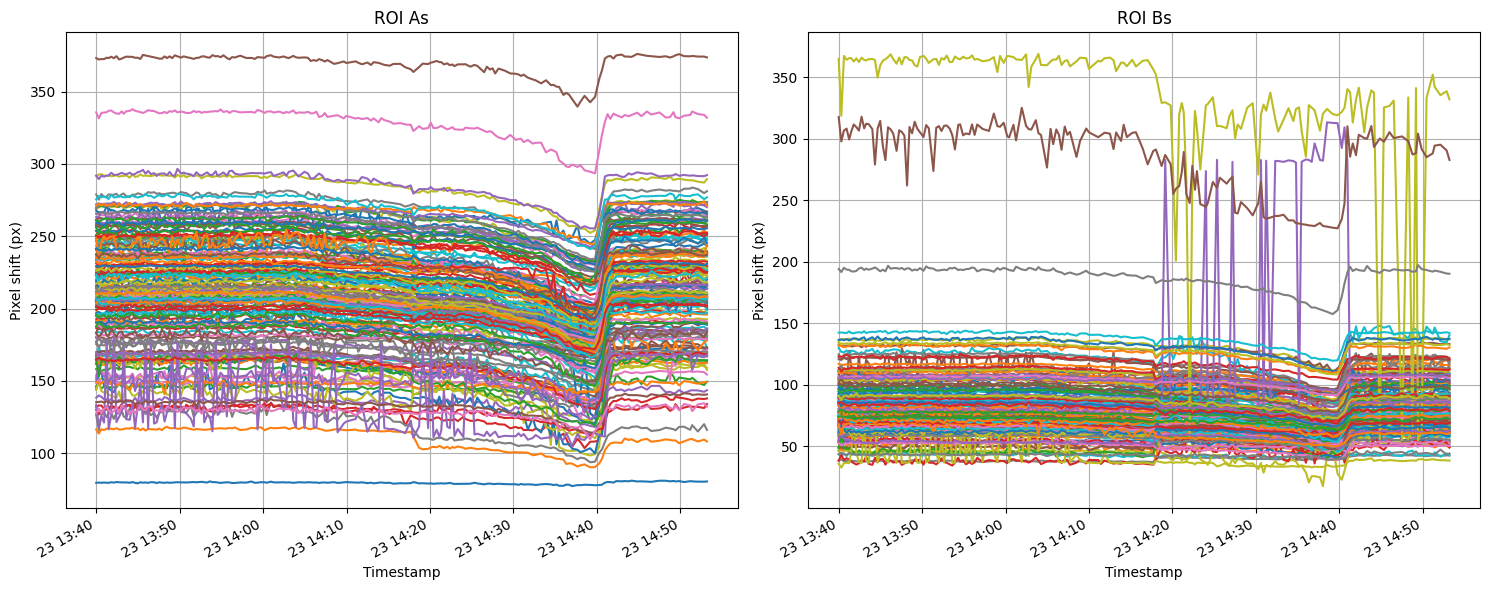

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

comb_df.loc[:, comb_df.columns.str.contains('A')].plot(
    kind='line',
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

comb_df.loc[:, comb_df.columns.str.contains('B')].plot(
    kind='line',
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

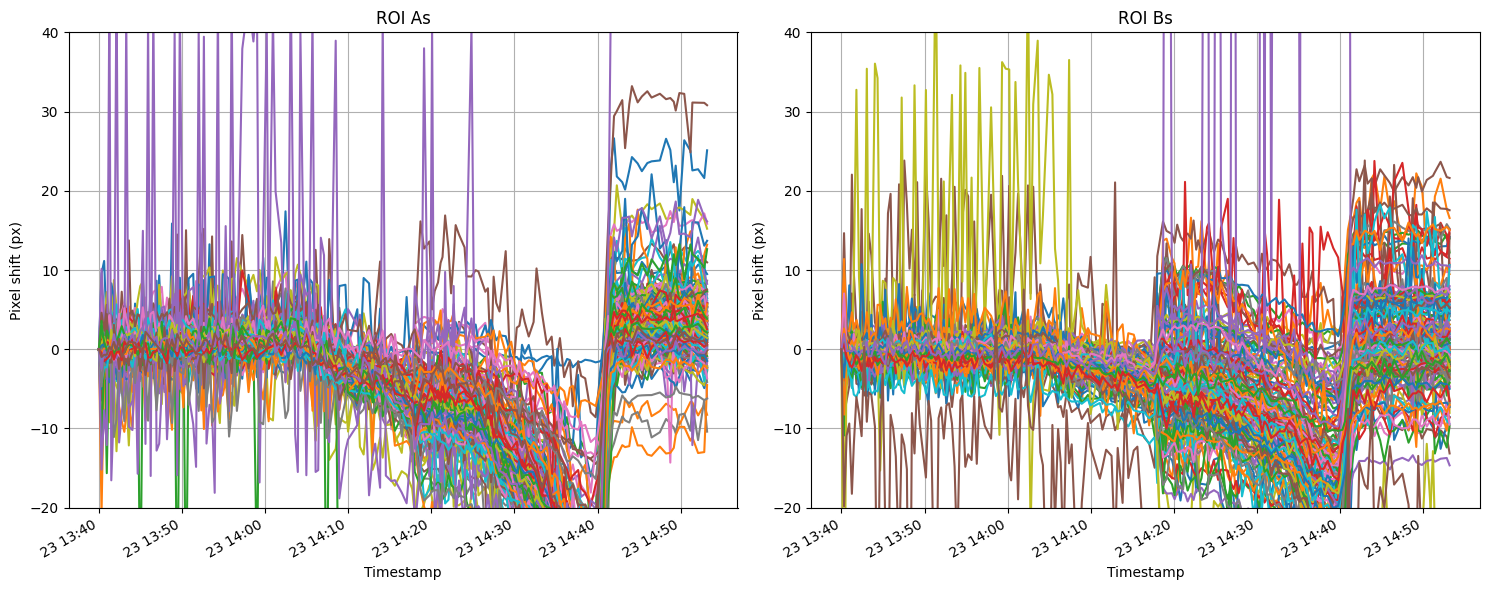

In [25]:
y_limits = (-20, 40)
window_size = 20
normalized_df = comb_df - comb_df.iloc[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

normalized_df.loc[:, normalized_df.columns.str.contains('A')].plot(
    kind='line',
    ylim=y_limits,
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

normalized_df.loc[:, normalized_df.columns.str.contains('B')].plot(
    kind='line',
    ylim=y_limits,
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

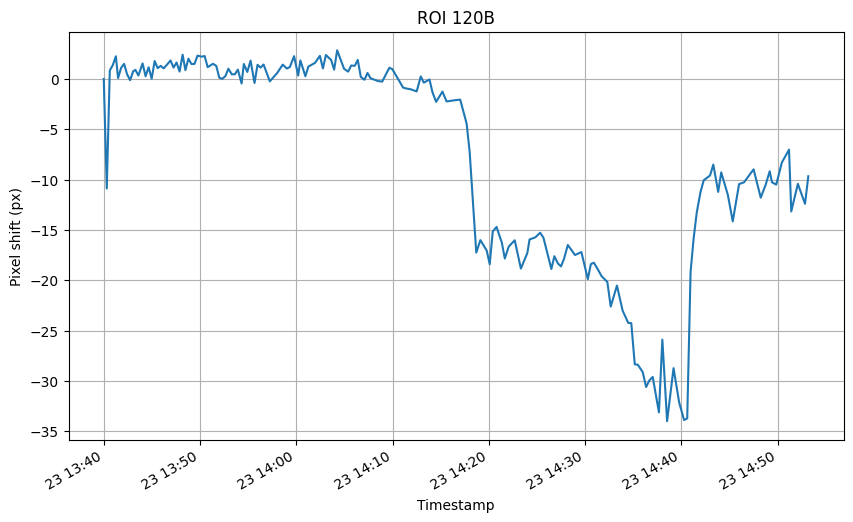

In [24]:
label = "120B"

normalized_df[label].plot(
    kind='line',
    figsize=(10, 6),
    title=f'ROI {label}',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

plt.grid(True) # Add a grid for better readability
plt.show()

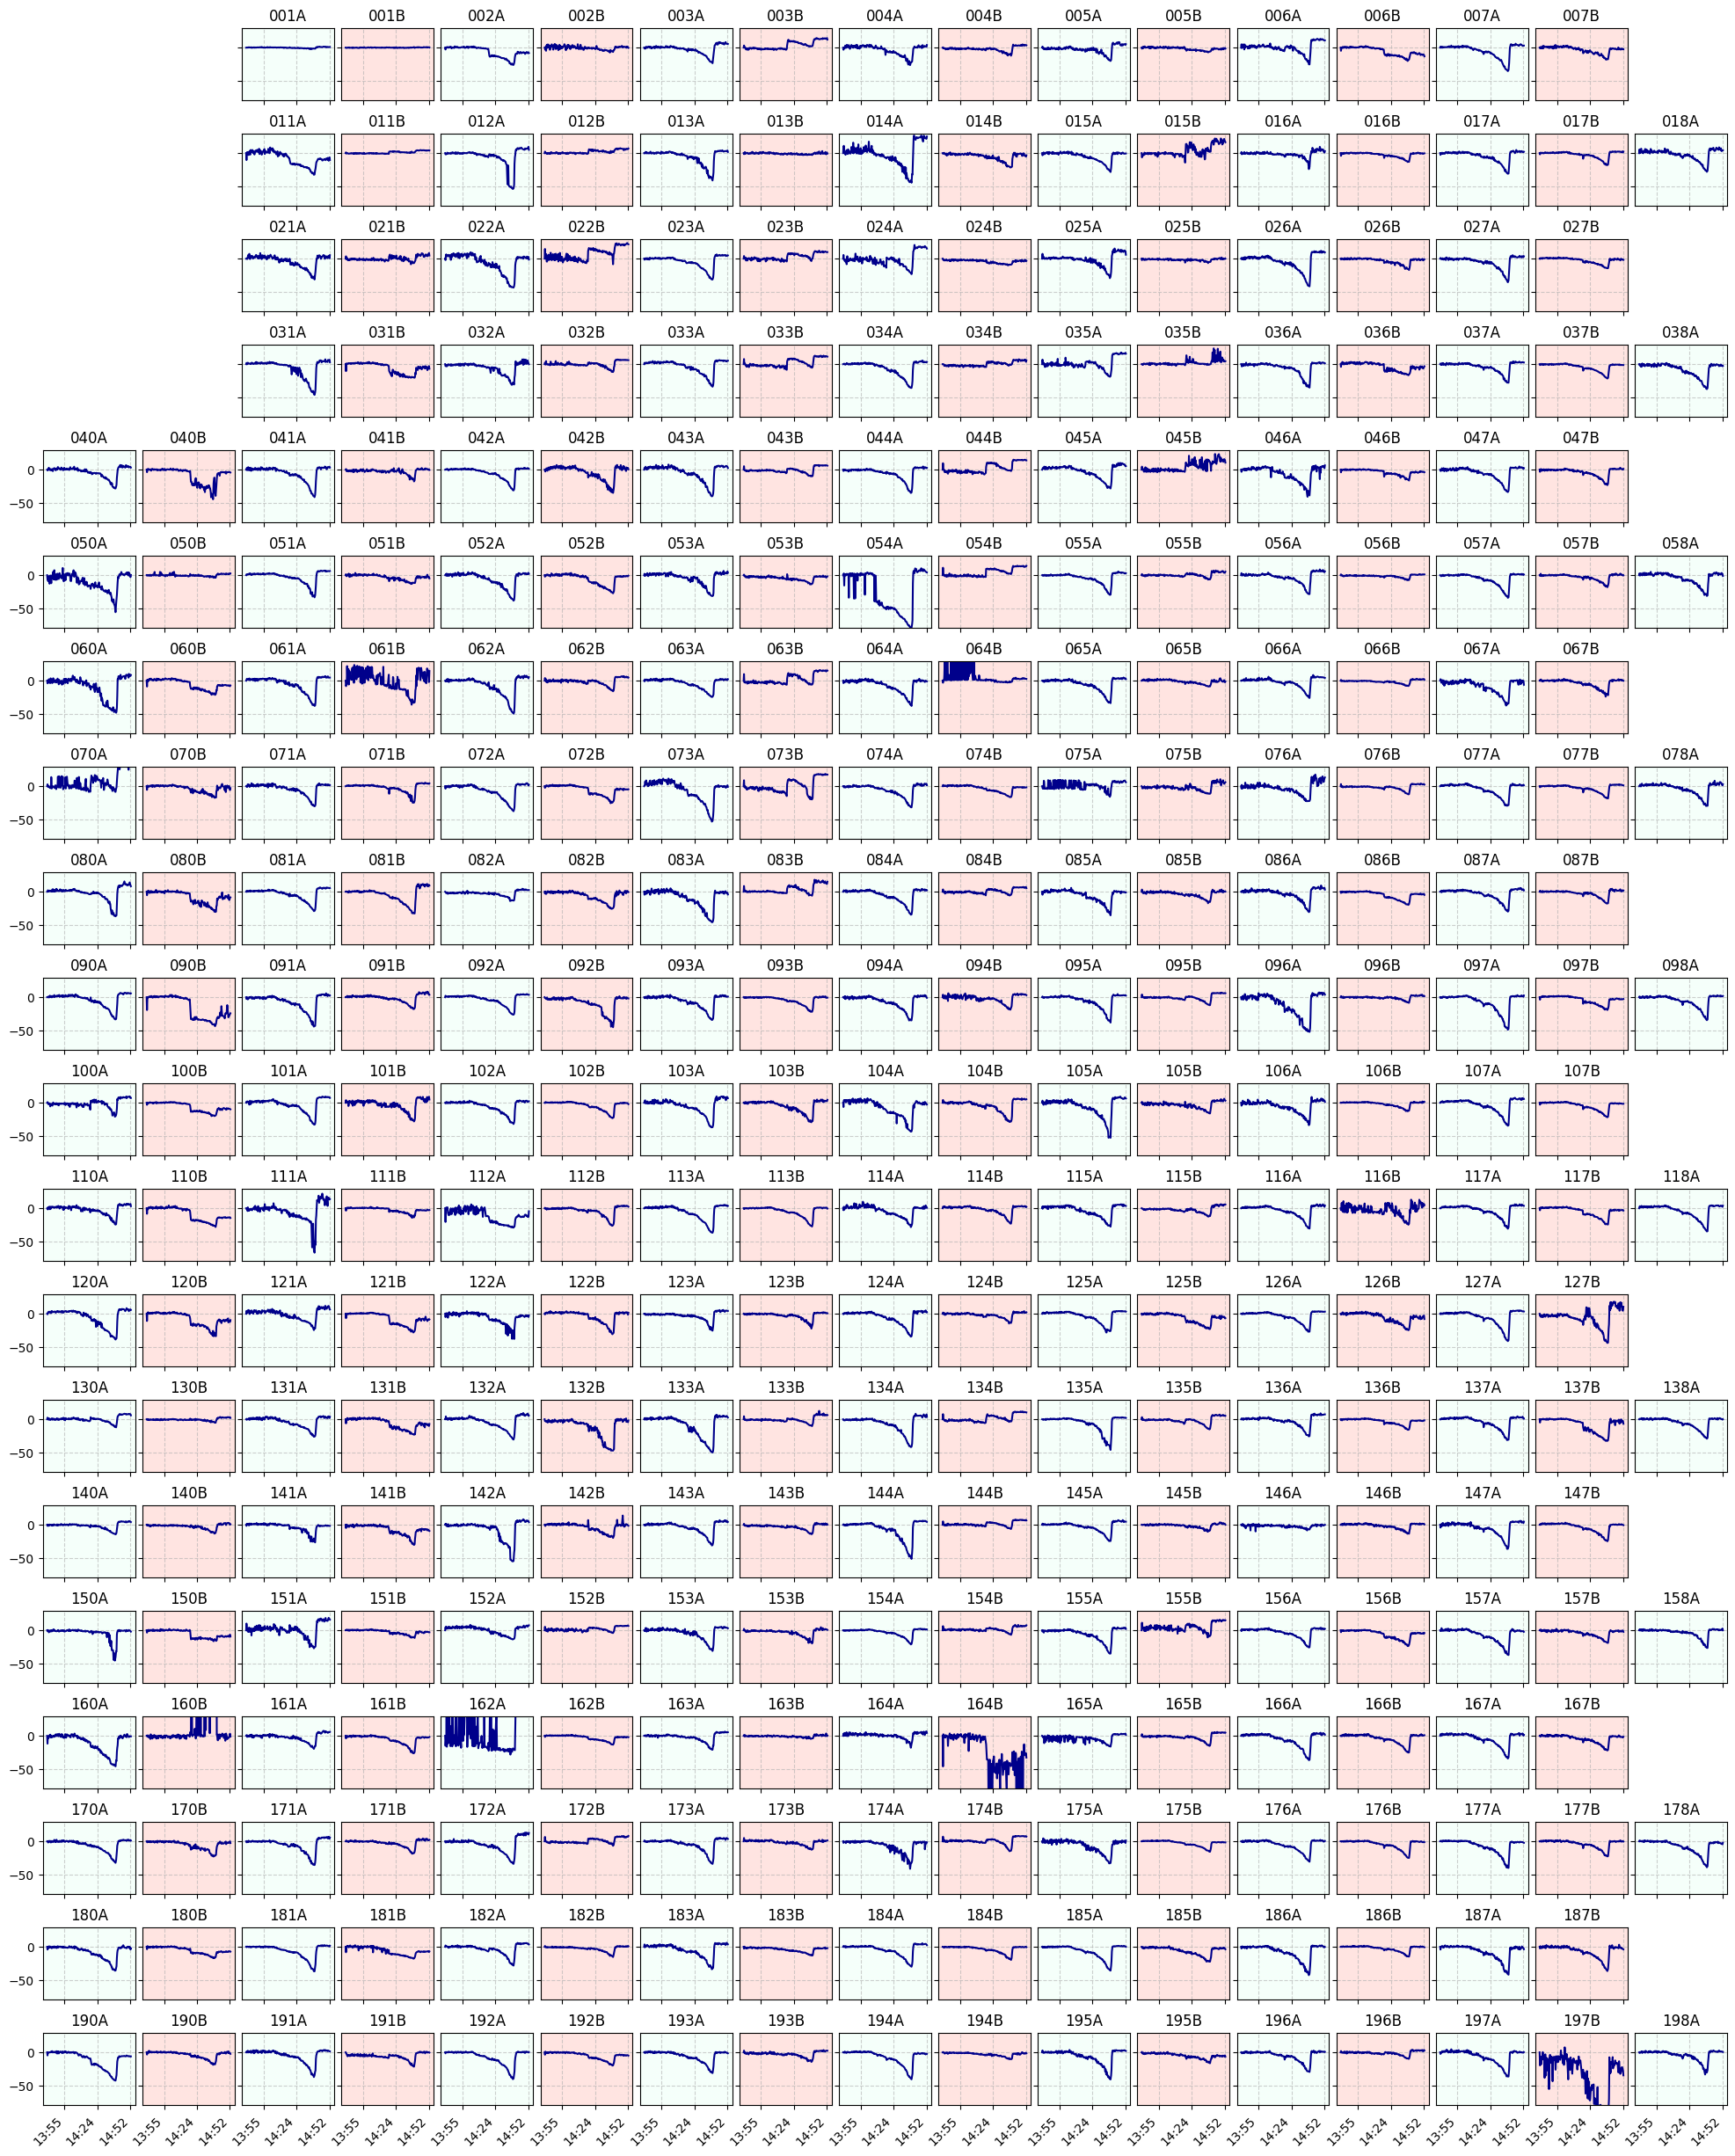

In [ ]:
roi_x_nums = sorted(list(set([roi[2:] for roi in rois])))
roi_y_nums = sorted(list(set([roi[:2] for roi in rois])))

fig, ax = plt.subplots(len(roi_y_nums), len(roi_x_nums),
                       figsize=(20, 30),
                       sharex=True,
                       sharey=True)

# fig.supxlabel("Timestamp")
# fig.supylabel("Pixel shift (px)")

plt.ylim(y_limits[0], y_limits[1])
ax[0, 0].xaxis.set_major_locator(mticker.MaxNLocator(nbins=3))
time_formatter = mdates.DateFormatter('%H:%M')
ax[-1, 0].xaxis.set_major_formatter(time_formatter)

type_colours = {'A': 'mintcream', 'B': 'mistyrose'}
# type_colours = {'A': 'honeydew', 'B': 'seashell'}
# type_colours = {'A': 'honeydew', 'B': 'snow'}
ax = ax.flatten()

# Turn off all axes
for a in ax:
    a.axis('off')

x_values = normalized_df.index
count = 0
for y in roi_y_nums:
    for x in roi_x_nums:
        roi_label = f"{y}{x}"
        type_part = roi_label[-1]
        try:
            y_values = normalized_df[roi_label].diff().values
            ax[count].plot(x_values, y_values, color='darkblue')
            ax[count].axis('on')
            ax[count].set_facecolor(type_colours.get(type_part, 'white'))
            ax[count].set_title(roi_label)
            ax[count].grid(True, linestyle='--', alpha=0.6)
        except KeyError:
            pass
        count += 1

plt.tight_layout()
fig.subplots_adjust(wspace=0.08, hspace=0.45)
fig.autofmt_xdate(rotation=45)
# plt.savefig(Path(raw_data.parent, "Array_data.png"), dpi=300)

In [80]:
plt.savefig("Array_data.png", dpi=300)

<Figure size 640x480 with 0 Axes>

Timeseries analysis

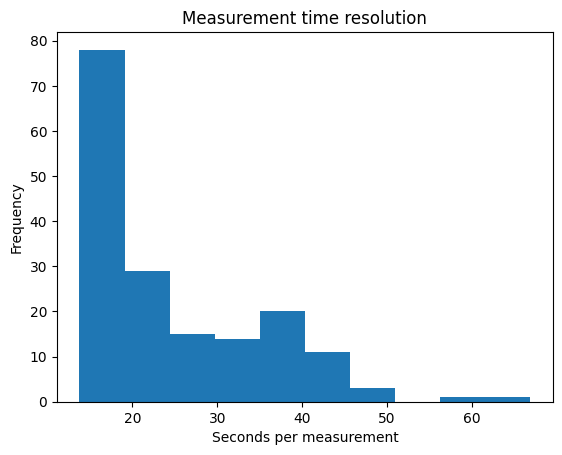

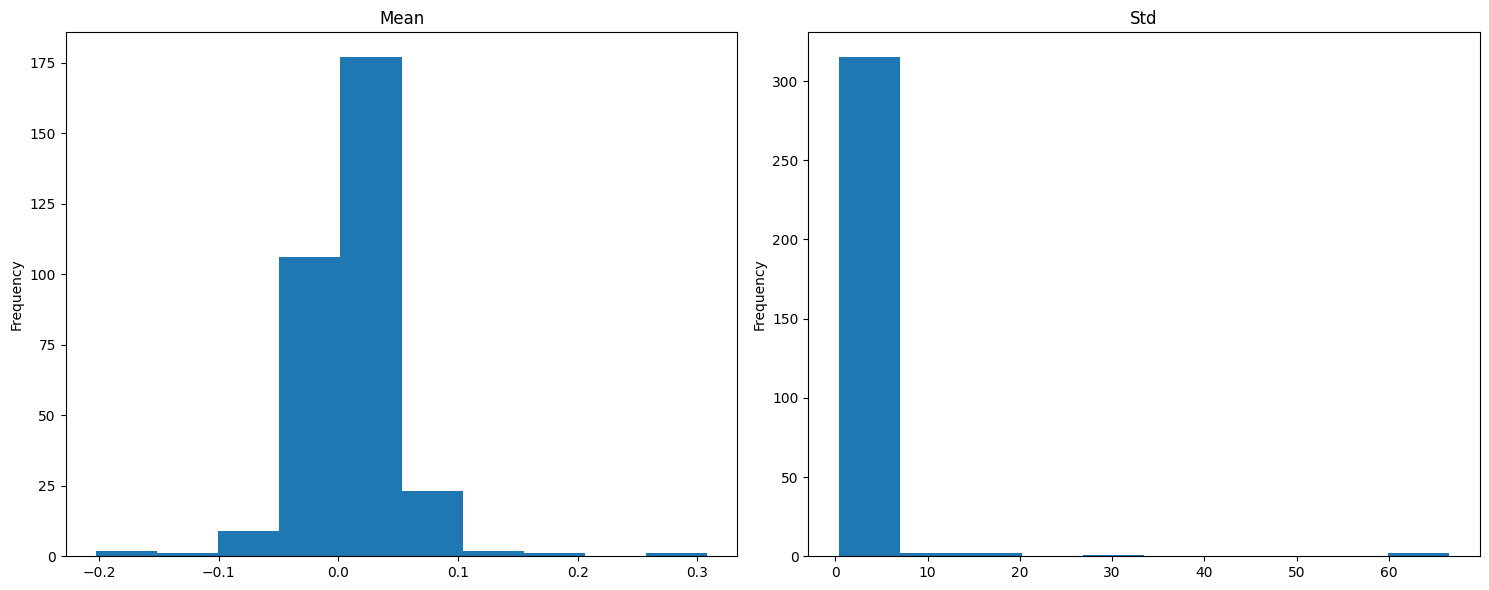

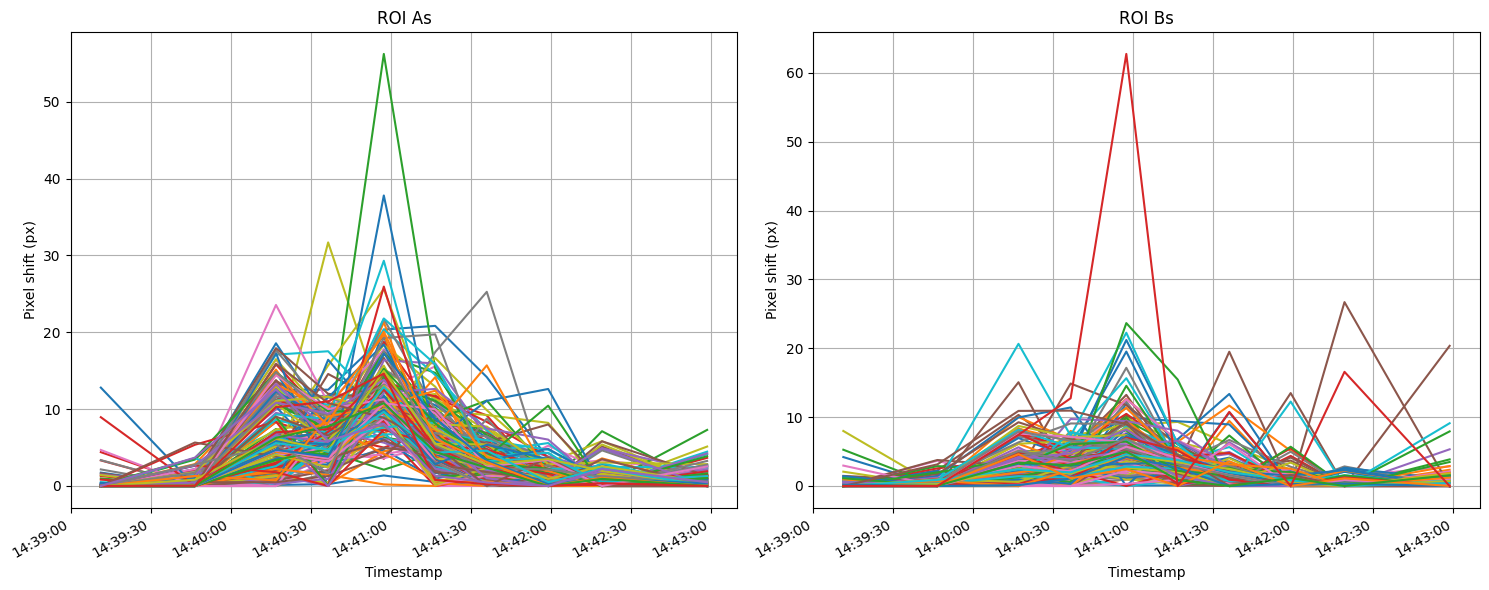

001A   2025-07-23 14:40:57.449327
001B   2025-07-23 14:39:46.585899
002A   2025-07-23 14:40:57.449327
002B   2025-07-23 14:40:17.000505
003A   2025-07-23 14:40:17.000505
                  ...            
196A   2025-07-23 14:40:57.449327
196B   2025-07-23 14:40:57.449327
197A   2025-07-23 14:40:57.449327
197B   2025-07-23 14:40:57.449327
198A   2025-07-23 14:40:17.000505
Length: 319, dtype: datetime64[ns]
2025-07-23 14:40:50.085795072


<Axes: ylabel='Frequency'>

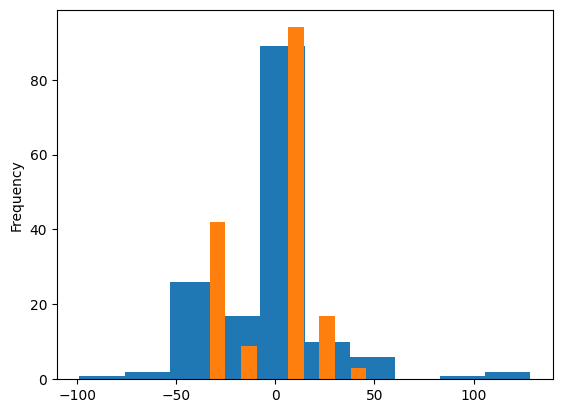

In [94]:
y_limits = (-20, 40)
normalized_df = comb_df - comb_df.iloc[0]
diff_df = normalized_df.diff()

time_diffs = pd.Series(diff_df.index).diff()
time_diffs.dt.total_seconds().dropna().plot(
    kind='hist',
    title='Measurement time resolution',
    xlabel='Seconds per measurement',
    ylabel='Frequency'
)

stats_df = diff_df.describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax = ax.flatten()
stats_df['mean'].plot(
    kind='hist',
    # ylim=(0, 10),
    ax=ax[0],
    legend=False,
    title='Mean',
)
stats_df['std'].plot(
    kind='hist',
    # ylim=(0, 10),
    ax=ax[1],
    legend=False,
    title='Std',
)

plt.tight_layout()
plt.show()

std_threshold = 20

cols_from_describe = stats_df[stats_df['std'] < std_threshold].index
filtered_df = diff_df[cols_from_describe]

window_size = 1
smoothed_df = filtered_df.rolling(window=window_size).median()

clip_thresh = 0
thesh_df = smoothed_df.mask(smoothed_df < clip_thresh, 0)

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# thesh_df.loc[:, thesh_df.columns.str.contains('A')].plot(
#     kind='line',
#     # ylim=y_limits,
#     ax=ax[0],
#     legend=False,
#     title='ROI As',
#     xlabel='Timestamp',
#     ylabel='Pixel shift (px)'
# )

# thesh_df.loc[:, thesh_df.columns.str.contains('B')].plot(
#     kind='line',
#     # ylim=y_limits,
#     ax=ax[1],
#     legend=False,
#     title='ROI Bs',
#     xlabel='Timestamp',
#     ylabel='Pixel shift (px)'
# )

# ax[0].grid(True) # Add a grid for better readability
# ax[1].grid(True) # Add a grid for better readability
# plt.tight_layout()
# plt.show()

timewindow = ('2025-07-23 14:39:00', '2025-07-23 14:43:00')
time_window_filter = thesh_df[timewindow[0]:timewindow[1]]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
time_window_filter.loc[:, time_window_filter.columns.str.contains('A')].plot(
    kind='line',
    # ylim=y_limits,
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

time_window_filter.loc[:, time_window_filter.columns.str.contains('B')].plot(
    kind='line',
    # ylim=y_limits,
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

max_timestamps = time_window_filter.idxmax()
print(max_timestamps)
mean_overall_timestamp = max_timestamps.mean()
print(mean_overall_timestamp)
time_diff = max_timestamps - mean_overall_timestamp
time_diff_seconds = time_diff.dt.total_seconds()
time_diff_seconds[time_diff_seconds.index.str.contains("B")].plot(kind='hist')
time_diff_seconds[time_diff_seconds.index.str.contains("A")].plot(kind='hist')


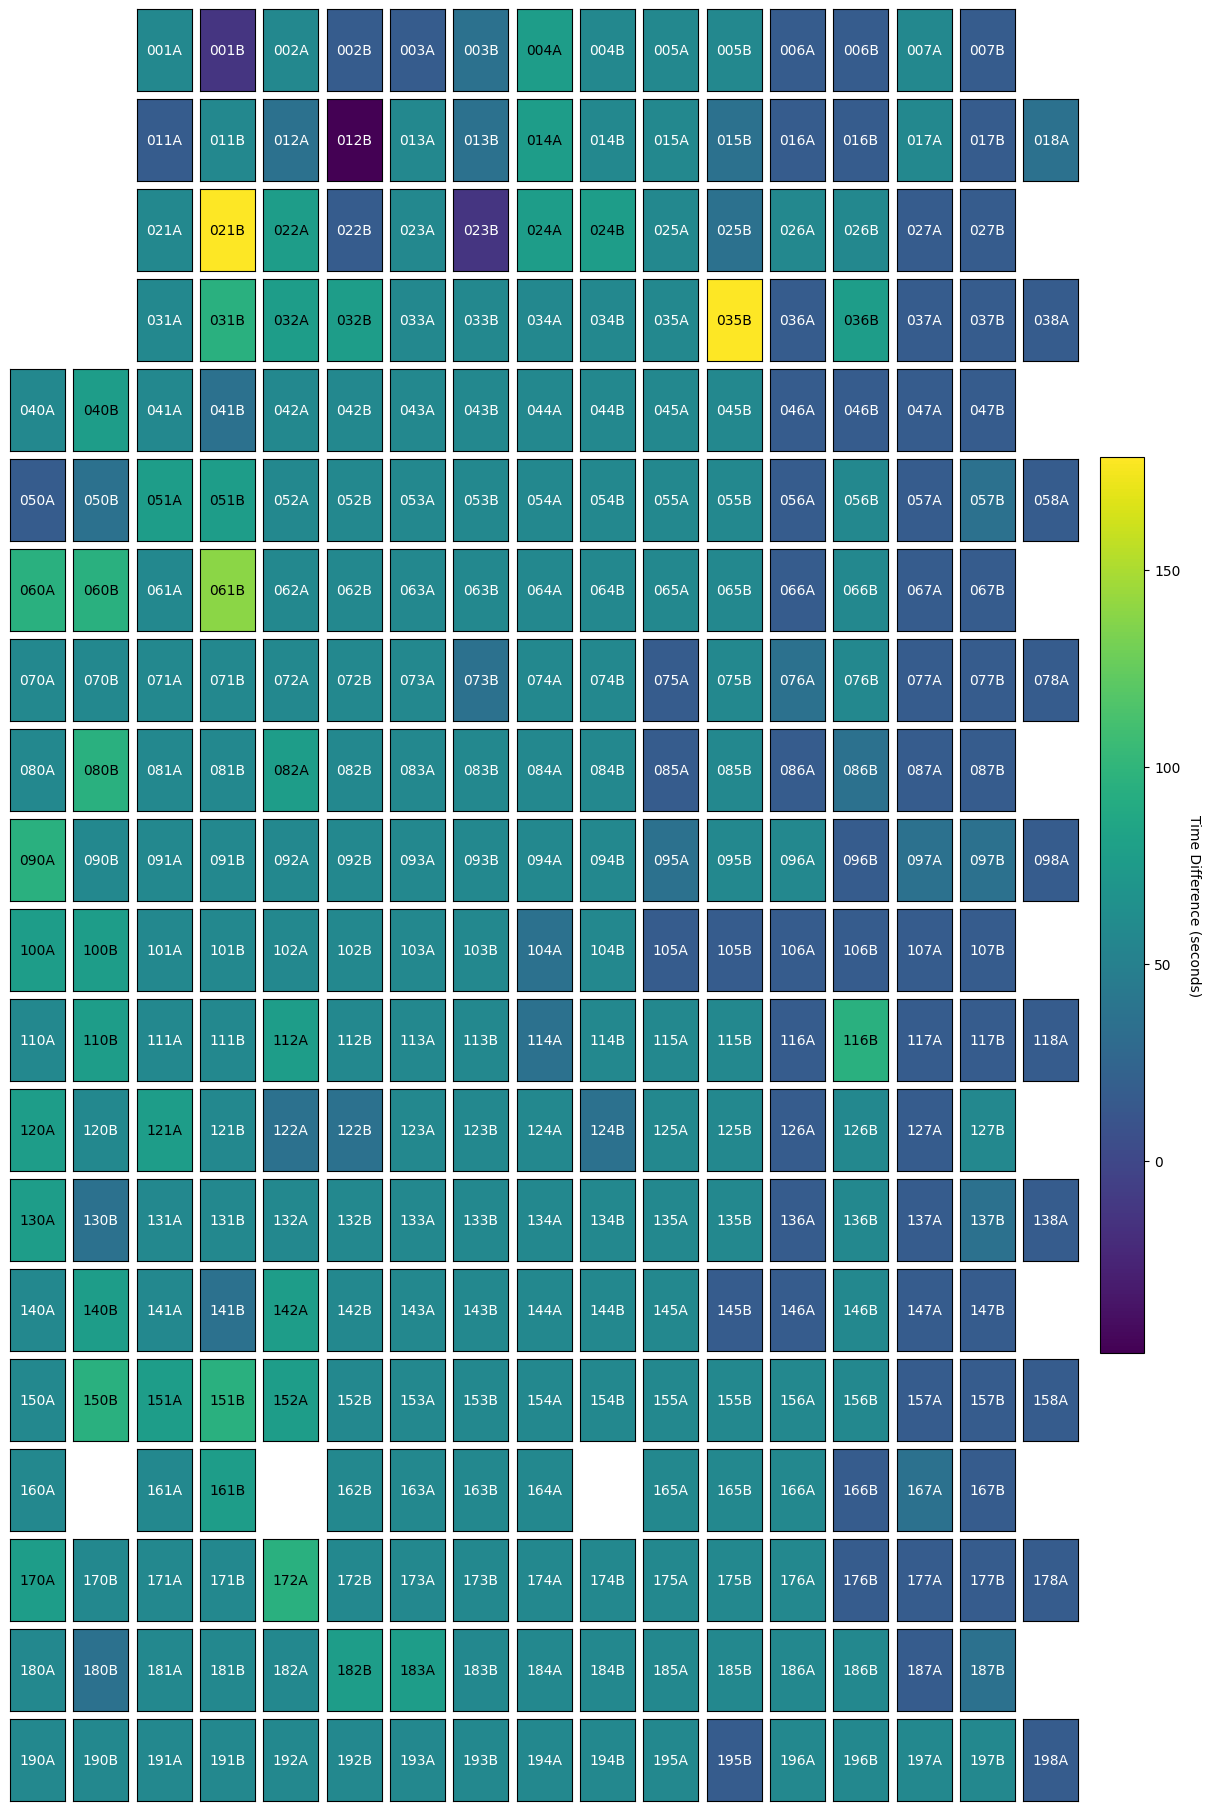

In [87]:
cmap = plt.get_cmap('viridis')
vmin = time_diff_seconds.min()
vmax = time_diff_seconds.max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

roi_x_nums = sorted(list(set([roi[2:] for roi in rois])))
roi_y_nums = sorted(list(set([roi[:2] for roi in rois])))


fig, ax = plt.subplots(len(roi_y_nums), len(roi_x_nums),
                       figsize=(12, 18),
                       constrained_layout=True)
ax = ax.flatten()

count = 0
for y in roi_y_nums:
    for x in roi_x_nums:
        roi_label = f"{y}{x}"
        ax[count].set_xticks([])
        ax[count].set_yticks([])

        try:
            seconds = time_diff_seconds[roi_label]
            patch_color = cmap(norm(seconds))
            ax[count].set_facecolor(patch_color)
            ax[count].text(0.5, 0.5, roi_label,
                           ha='center', va='center',
                           fontsize=10, color='white' if norm(seconds) < 0.5 else 'black')
        except KeyError:
            ax[count].axis('off')

        count += 1

# Create a ScalarMappable to link the colormap and normalization
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # You have to set a dummy array for this to work

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, shrink=0.5)
cbar.set_label('Time Difference (seconds)', rotation=270, labelpad=15)

plt.savefig(Path(raw_data.parent, "Array_time_data.png"), dpi=300)